In [1]:


from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/'



Mounted at /content/drive


In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

In [57]:
import pandas as pd

# Load the RWI data from the CSV file
rwi_data = pd.read_csv(abspath_curr + '/data/pak_rwi.csv')


In [43]:
# Explore the data
print("Data Overview:")
print(rwi_data.head())  # Display the first few rows of the data
print("\nData Statistics:")
print(rwi_data.describe())  # Display basic statistics of the data
print("\nData Information:")
print(rwi_data.info())  # Display data type information and non-null counts

Data Overview:
    latitude  longitude    rwi  error
0  33.897776  70.037842 -0.074  0.624
1  31.118794  66.807861 -0.569  0.368
2  32.648625  73.245850 -0.193  0.498
3  35.182788  72.894287 -0.178  0.355
4  25.948166  69.268799 -0.530  0.450

Data Statistics:
            latitude      longitude            rwi          error
count  594823.000000  594823.000000  594823.000000  594823.000000
mean       23.615915      78.059836      -0.149092       0.469263
std         5.672470       5.852006       0.411446       0.049406
min         6.806444      61.248779      -1.578000       0.298000
25%        20.128155      74.080810      -0.441000       0.433000
50%        24.236947      77.244873      -0.212000       0.470000
75%        27.342494      81.375732       0.083000       0.504000
max        36.835668      97.020264       2.162000       0.694000

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594823 entries, 0 to 594822
Data columns (total 4 columns):
 #   Column     

In [44]:
import geopandas as gpd
from shapely.geometry import Point

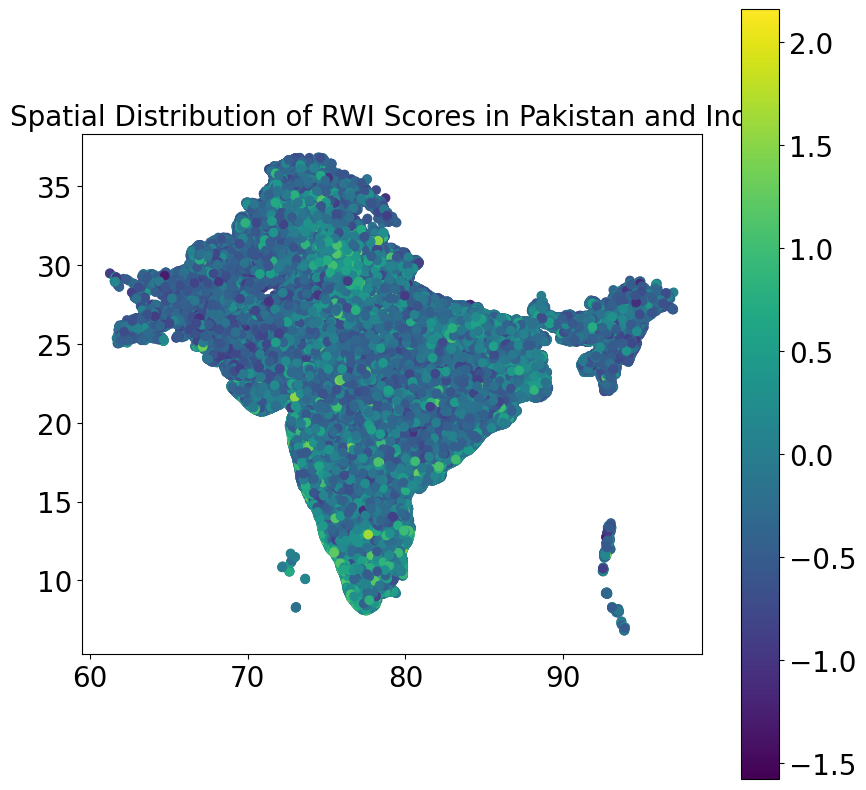

In [58]:
# Create a GeoDataFrame from the Latitude and Longitude columns
geometry = [Point(lon, lat) for lon, lat in zip(rwi_data['longitude'], rwi_data['latitude'])]
geo_df = gpd.GeoDataFrame(rwi_data, geometry=geometry)

# Plot the spatial distribution of RWI scores
fig, ax = plt.subplots(figsize=(10, 10))
geo_df.plot(column='rwi', cmap='viridis', legend=True, ax=ax)
ax.set_title('Spatial Distribution of RWI Scores in Pakistan and India')
plt.show()

   Shape_Leng  Shape_Area   ADM3_EN ADM3_PCODE  ADM3_REF  ADM3ALT1EN  \
0    0.787535    0.026364      Bagh    PK10101       NaN         NaN   
1    0.814649    0.023020  Dhir Kot    PK10102       NaN         NaN   
2    0.706433    0.018374  Harighel    PK10103       NaN         NaN   
3    1.065949    0.043881   Barnala    PK10201       NaN         NaN   
4    1.126513    0.035945   Bhimber    PK10202       NaN         NaN   

   ADM3ALT2EN  ADM2_EN ADM2_PCODE       ADM1_EN ADM1_PCODE   ADM0_EN  \
0         NaN     Bagh      PK101  Azad Kashmir        PK1  Pakistan   
1         NaN     Bagh      PK101  Azad Kashmir        PK1  Pakistan   
2         NaN     Bagh      PK101  Azad Kashmir        PK1  Pakistan   
3         NaN  Bhimber      PK102  Azad Kashmir        PK1  Pakistan   
4         NaN  Bhimber      PK102  Azad Kashmir        PK1  Pakistan   

  ADM0_PCODE        date     validOn  validTo  \
0         PK  2022-09-02  2022-09-09      NaN   
1         PK  2022-09-02  2022-09-09

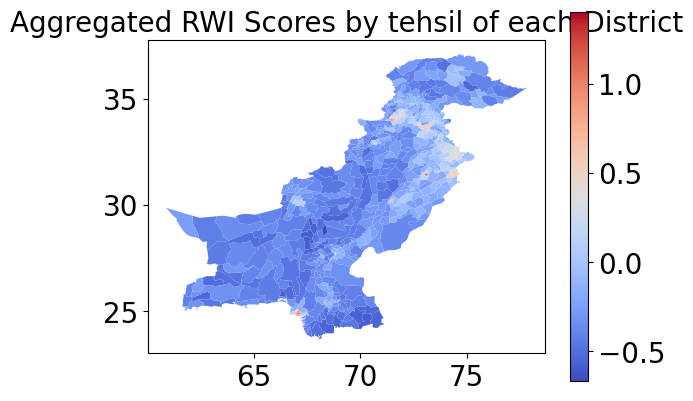

In [60]:
# Load the administrative level shapefile
districts = gpd.read_file(abspath_curr + '/data/pak_admbnda_adm3_wfp_20220909.shp')
print(districts.head())

# Perform a spatial join to aggregate RWI scores by district
merged_data = gpd.sjoin(districts, geo_df, how='left', op='intersects')

# Calculate mean RWI score for each tehsil of each district
district_agg = merged_data.groupby('ADM3_EN')['rwi'].mean().reset_index()
print(district_agg)

# Merge the aggregated data with the administrative boundaries
merged_data = districts.merge(district_agg, left_on='ADM3_EN', right_on='ADM3_EN', how='left')

# Plot the aggregated RWI data
merged_data.plot(column='rwi', cmap='coolwarm', legend=True)
plt.title('Aggregated RWI Scores by tehsil of each District')
plt.show()


   Shape_Leng  Shape_Area   ADM0_EN ADM0_PCODE  ADM0_REF  ADM0ALT1EN  \
0   87.925272   82.027679  Pakistan         PK       NaN         NaN   

   ADM0ALT2EN        date     validOn  validTo  \
0         NaN  2022-09-02  2022-09-09      NaN   

                                            geometry  
0  MULTIPOLYGON (((68.18577 23.83741, 68.19128 23...  
    ADM0_EN       rwi
0  Pakistan -0.194702


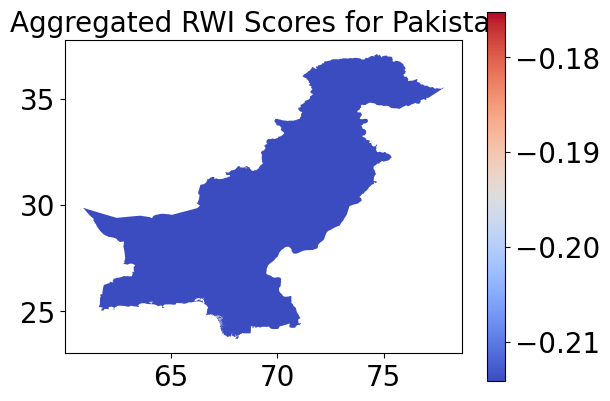

In [61]:
districts = gpd.read_file(abspath_curr + '/data/pak_admbnda_adm0_wfp_20220909.shp')
print(districts.head())
district_agg = merged_data.groupby('ADM0_EN')['rwi'].mean().reset_index()
print(district_agg)

# Merge the aggregated data with the administrative boundaries
merged_data = districts.merge(district_agg, left_on='ADM0_EN', right_on='ADM0_EN', how='left')

# Plot the aggregated RWI data
merged_data.plot(column='rwi', cmap='coolwarm', legend=True)
plt.title('Aggregated RWI Scores for Pakistan ')
plt.show()

   Shape_Leng  Shape_Area             ADM1_EN ADM1_PCODE  ADM1_REF  \
0    9.397279    1.114820        Azad Kashmir        PK1       NaN   
1   42.062462   31.918295         Balochistan        PK2       NaN   
2   16.021756    6.955875    Gilgit Baltistan        PK3       NaN   
3    1.745310    0.087645           Islamabad        PK4       NaN   
4   27.332818    9.864889  Khyber Pakhtunkhwa        PK5       NaN   

   ADM1ALT1EN  ADM1ALT2EN   ADM0_EN ADM0_PCODE        date     validOn  \
0         NaN         NaN  Pakistan         PK  2022-09-02  2022-09-09   
1         NaN         NaN  Pakistan         PK  2022-09-02  2022-09-09   
2         NaN         NaN  Pakistan         PK  2022-09-02  2022-09-09   
3         NaN         NaN  Pakistan         PK  2022-09-02  2022-09-09   
4         NaN         NaN  Pakistan         PK  2022-09-02  2022-09-09   

   validTo                                           geometry  
0      NaN  POLYGON ((74.46635 35.11060, 74.46940 35.11029...  
1     

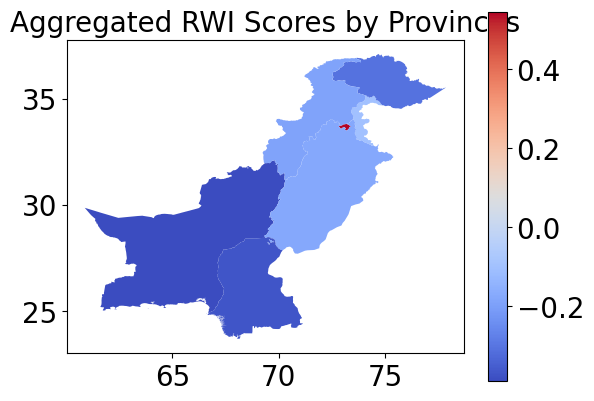

In [63]:
districts = gpd.read_file(abspath_curr + '/data/pak_admbnda_adm1_wfp_20220909.shp')
print(districts.head())

# Perform a spatial join to aggregate RWI scores by district
merged_data = gpd.sjoin(districts, geo_df, how='left', op='intersects')

district_agg = merged_data.groupby('ADM1_EN')['rwi'].mean().reset_index()
print(district_agg)

# Merge the aggregated data with the administrative boundaries
merged_data = districts.merge(district_agg, left_on='ADM1_EN', right_on='ADM1_EN', how='left')

# Plot the aggregated RWI data
merged_data.plot(column='rwi', cmap='coolwarm', legend=True)
plt.title('Aggregated RWI Scores by Provinces')
plt.show()


   Shape_Leng  Shape_Area        ADM2_EN ADM2_PCODE  ADM2_REF  ADM2ALT1EN  \
0    1.594116    0.067758           Bagh      PK101       NaN         NaN   
1    1.987888    0.117047        Bhimber      PK102       NaN         NaN   
2    1.300416    0.066683  Jhelum Valley      PK103       NaN         NaN   
3    1.001545    0.053722         Haveli      PK104       NaN         NaN   
4    2.017824    0.155069          Kotli      PK105       NaN         NaN   

   ADM2ALT2EN       ADM1_EN ADM1_PCODE   ADM0_EN ADM0_PCODE        date  \
0         NaN  Azad Kashmir        PK1  Pakistan         PK  2022-09-02   
1         NaN  Azad Kashmir        PK1  Pakistan         PK  2022-09-02   
2         NaN  Azad Kashmir        PK1  Pakistan         PK  2022-09-02   
3         NaN  Azad Kashmir        PK1  Pakistan         PK  2022-09-02   
4         NaN  Azad Kashmir        PK1  Pakistan         PK  2022-09-02   

      validOn  validTo                                           geometry  
0  2022-09

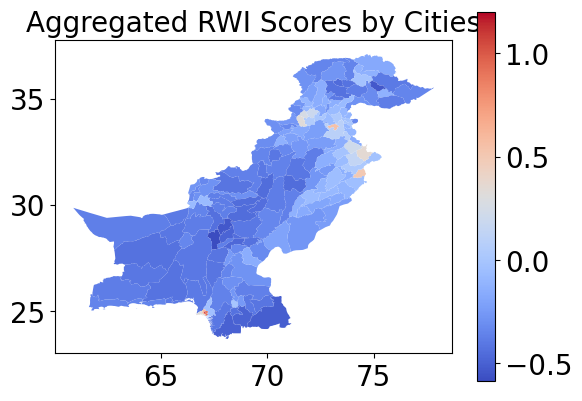

In [64]:
districts = gpd.read_file(abspath_curr + '/data/pak_admbnda_adm2_wfp_20220909.shp')
print(districts.head())

# Perform a spatial join to aggregate RWI scores by district
merged_data = gpd.sjoin(districts, geo_df, how='left', op='intersects')

district_agg = merged_data.groupby('ADM2_EN')['rwi'].mean().reset_index()
print(district_agg)
# Merge the aggregated data with the administrative boundaries
merged_data = districts.merge(district_agg, left_on='ADM2_EN', right_on='ADM2_EN', how='left')

# Plot the aggregated RWI data
merged_data.plot(column='rwi', cmap='coolwarm', legend=True)
plt.title('Aggregated RWI Scores by Cities')
plt.show()

In [50]:
import fiona
fiona.os.environ['SHAPE_RESTORE_SHX'] = 'YES'


In [51]:
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load DHS dataset
dhs_data = pd.read_stata(abspath_curr + '/data/PK_2019_DHS/PKBQ7ADT/PKBQ7AFL.DTA')
dhs_data.head()

,qhclust,qhnumber,qh20,qhregion,qhdist,qhtype,qhshort,qhintd,qhintm,qhinty,...,qsh143,qsh144,qh22,qh23m,qh23y,qh24,qh25,qh26,qh23c,qh23f
0,1,1,1,ajk,bhimber,rural,no,19,6,2019,...,cement/rcc,cement,girl,1,2019,yes,yes,8.0,1429,month and year
1,1,1,2,ajk,bhimber,rural,no,19,6,2019,...,cement/rcc,cement,girl,7,2016,yes,yes,5.0,1399,month and year
2,1,3,1,ajk,bhimber,rural,yes,19,6,2019,...,NaN,NaN,girl,8,2018,yes,yes,9.0,1424,month and year
3,1,5,1,ajk,bhimber,rural,yes,19,6,2019,...,NaN,NaN,boy,5,2019,yes,yes,3.0,1433,month and year
4,1,10,1,ajk,bhimber,rural,yes,19,6,2019,...,NaN,NaN,boy,10,2018,yes,yes,6.0,1426,month and year


In [30]:
dhs_data = pd.read_stata(abspath_curr + '/data/PK_2019_DHS/PKCH7ADT/PKCH7AFL.DTA')
dhs_data.head()

,qhclust,qhnumber,qline,q212,q212a,q212b,q212c,q213,q215d,q215m,...,q220ad,q221,qlast3,q215c,q215cd,q215di,q215f,q220c,q220f,pregout
0,1,1,2,1,single,lost before full term,NaN,NaN,NaN,NaN,...,no,NaN,no,1093,33247,9,"month, year and day",NaN,NaN,miscarriage
1,1,1,2,2,single,born alive,NaN,boy,5.0,4.0,...,NaN,no,no,1108,33699,5,"month, year and day",NaN,NaN,live birth
2,1,1,2,3,single,born alive,NaN,boy,29.0,5.0,...,NaN,no,no,1121,34118,29,"month, year and day",NaN,NaN,live birth
3,1,1,2,4,single,born alive,NaN,boy,29.0,7.0,...,NaN,no,no,1147,34909,29,"month, year and day",NaN,NaN,live birth
4,1,1,2,5,single,born alive,NaN,girl,1.0,2.0,...,NaN,no,no,1166,35462,1,"month, year and day",NaN,NaN,live birth


In [31]:
dhs_data = pd.read_stata(abspath_curr + '/data/PK_2019_DHS/PKFW7ADT/PKFW7AFL.DTA')
dhs_data.head()

,fw101,fw000,fw102,fw103,fw104,fw105,fw106,fw107,fw108,fw109,...,fw113d,fw113e,fw113f,fw113g,fw113x,fw114,fw115,fw116,fw117,fw118
0,100,PK7,punjab,urban,28,male,never married,0,no,NaN,...,D,E,,,,punjabi,yes,yes,no,NaN
1,101,PK7,punjab,rural,29,female,never married,0,no,NaN,...,D,,,,,punjabi,no,yes,no,NaN
2,102,PK7,punjab,urban,33,female,never married,0,no,NaN,...,D,E,,,,sariaki,no,yes,no,NaN
3,103,PK7,punjab,urban,37,female,never married,0,no,NaN,...,D,E,,,,punjabi,no,yes,no,NaN
4,104,PK7,punjab,urban,33,female,currently married,2,no,NaN,...,D,E,,,,sariaki,no,yes,no,NaN


In [32]:
dhs_data = pd.read_stata(abspath_curr + '/data/PK_2019_DHS/PKHH7ADT/PKHH7AFL.DTA')
dhs_data.head()

,qhclust,qhnumber,qhregion,qhdist,qhtype,qhshort,qhintd,qhintm,qhinty,qhintnum,...,qsh122d,qsh122e,qsh122f,qsh122g,qsh122h,qsh122i,qsh122j,qsh142,qsh143,qsh144
0,1,1,ajk,bhimber,rural,no,19,6,2019,3103,...,yes,no,no,no,no,no,no,cement,cement/rcc,cement
1,1,2,ajk,bhimber,rural,yes,19,6,2019,3101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,ajk,bhimber,rural,yes,19,6,2019,3101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,ajk,bhimber,rural,yes,19,6,2019,3107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,ajk,bhimber,rural,yes,19,6,2019,3107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
dhs_data = pd.read_stata(abspath_curr + '/data/PK_2019_DHS/PKIQ7ADT/PKIQ7AFL.DTA')
dhs_data.head()

,qhclust,qhnumber,qline,qregion,qdist,qtype,qqtype,qintd,qintm,qinty,...,q628n,q629,q630,q631,q632,q633a,q634,q635,q636h,q636m
0,1,1,2,ajk,bhimber,rural,female,19,6,2019,...,NaN,NaN,,,NaN,NaN,NaN,NaN,11.0,50.0
1,1,1,4,ajk,bhimber,rural,female,19,6,2019,...,NaN,NaN,,,NaN,NaN,NaN,NaN,11.0,52.0
2,1,1,7,ajk,bhimber,rural,female,19,6,2019,...,NaN,NaN,,,NaN,NaN,NaN,NaN,12.0,1.0
3,1,12,1,ajk,bhimber,rural,female,19,6,2019,...,NaN,NaN,,,NaN,NaN,NaN,NaN,14.0,11.0
4,1,23,2,ajk,bhimber,rural,female,19,6,2019,...,NaN,NaN,,,NaN,NaN,NaN,NaN,15.0,45.0


In [34]:
dhs_data = pd.read_stata(abspath_curr + '/data/PK_2019_DHS/PKOD7ADT/PKOD7AFL.DTA')
dhs_data.head()

,qhclust,qhnumber,qh29,qhregion,qhdist,qhtype,qhshort,qhintd,qhintm,qhinty,...,qh32y,qh33u,qh33n,qh34,qh35,qh36,qh37,qh32c,qh32f,qh33c
0,1,8,1,ajk,bhimber,rural,yes,19,6,2019,...,2019,years,25,no,NaN,NaN,NaN,1434,month and year,1134
1,1,31,1,ajk,bhimber,rural,yes,20,6,2019,...,2016,years,54,no,NaN,NaN,NaN,1394,month and year,746
2,1,34,1,ajk,bhimber,rural,no,20,6,2019,...,2017,years,58,no,NaN,NaN,NaN,1416,month and year,720
3,1,36,1,ajk,bhimber,rural,yes,20,6,2019,...,2018,years,70,no,NaN,NaN,NaN,1428,month and year,588
4,1,39,1,ajk,bhimber,rural,yes,20,6,2019,...,2016,years,53,no,NaN,NaN,NaN,1403,month and year,767


In [35]:
dhs_data = pd.read_stata(abspath_curr + '/data/PK_2019_DHS/PKPQ7ADT/PKPQ7AFL.DTA')
dhs_data.head()

,qhclust,qhnumber,qh01,qhregion,qhdist,qhtype,qhshort,qhintd,qhintm,qhinty,...,qh07,qh08,qh09,qh16,qh17,ml07i,ml07f,mlpreg,qh07i,qh07f
0,1,1,1,ajk,bhimber,rural,no,19,6,2019,...,55.0,currently married,not eligible,yes,10.0,55.0,no data from individual questionnaire,NaN,55,no imputed
1,1,1,2,ajk,bhimber,rural,no,19,6,2019,...,45.0,currently married,2,yes,5.0,45.0,"age - y, m imp","no, don't know",45,no imputed
2,1,1,3,ajk,bhimber,rural,no,19,6,2019,...,27.0,currently married,not eligible,yes,14.0,27.0,no data from individual questionnaire,NaN,27,no imputed
3,1,1,4,ajk,bhimber,rural,no,19,6,2019,...,32.0,currently married,4,yes,12.0,32.0,month and year,"no, don't know",32,no imputed
4,1,1,5,ajk,bhimber,rural,no,19,6,2019,...,2.0,NaN,not eligible,NaN,NaN,2.0,no data from individual questionnaire,NaN,2,no imputed


In [36]:
dhs_data = pd.read_stata(abspath_curr + '/data/PK_2019_DHS/PKSQ7ADT/PKSQ7AFL.DTA')
dhs_data.head()

,tcluster,tregion,tdistrict,tintd,tintm,tinty,tinter,tresult,tintsex_1,tintsex_2,...,t301_03,t301_04,t301_05,t301_06,t301_07,t301_08,t301_09,t301_10,t301_11,t301_12
0,610,kpk,haripur,27,1,2019,2200,completed,male,male,...,14.0,15.0,12.0,15.0,4.0,4.0,4.0,0.0,1.0,15.0
1,110,ajk,bagh,24,1,2019,3200,completed,male,male,...,5.0,2.0,2.0,3.0,3.0,0.0,2.0,3.0,3.0,2.0
2,76,ajk,muzaffarabad,24,1,2019,3000,completed,male,end of list,...,4.0,4.0,4.0,4.0,0.0,0.0,4.0,4.0,4.0,4.0
3,1359,sindh,nawabshah/shaheed benazir abad,22,1,2019,1600,completed,male,male,...,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0
4,1363,sindh,nawabshah/shaheed benazir abad,26,1,2019,1600,completed,male,male,...,12.0,12.0,12.0,2.0,2.0,1.0,12.0,12.0,12.0,12.0


In [28]:
dhs_data = pd.read_stata(abspath_curr + '/data/PK_2019_DHS/PKVA7ADT/PKVA7AFL.DTA')
dhs_data.head()

,qhclust,qhnumber,qline,qregion,qdist,qtype,qqtype,qintd,qintm,qinty,...,qcd10a,qcd11,qcd12ac,qcd12bc,qcd13c,qcd13d,qcd13e1,qcd13e2,qcd13e3,qcd14
0,1,62,51,ajk,bhimber,rural,verbal autopsy,21,6,2019,...,NaN,no,E118,E118,non-obstetric death,not applicable (not a pregnancy-related death),not applicable (deaths not pregnancy related),not applicable (deaths not pregnancy related),not applicable (deaths not pregnancy related),average
1,3,9,51,ajk,bhimber,rural,verbal autopsy,16,6,2019,...,at time of death,no,T750,T750,coincidental obstetric death,death during pregnancy (before any signs of la...,no,no,no,average
2,8,21,51,ajk,bhimber,rural,verbal autopsy,21,6,2019,...,NaN,no,I219,I159,non-obstetric death,not applicable (not a pregnancy-related death),not applicable (deaths not pregnancy related),not applicable (deaths not pregnancy related),not applicable (deaths not pregnancy related),average
3,9,101,51,ajk,bhimber,rural,verbal autopsy,25,5,2019,...,NaN,no,I219,I219,non-obstetric death,not applicable (not a pregnancy-related death),not applicable (deaths not pregnancy related),not applicable (deaths not pregnancy related),not applicable (deaths not pregnancy related),good
4,9,107,51,ajk,bhimber,rural,verbal autopsy,25,5,2019,...,NaN,no,G809,G809,non-obstetric death,not applicable (not a pregnancy-related death),not applicable (deaths not pregnancy related),not applicable (deaths not pregnancy related),not applicable (deaths not pregnancy related),average
